In [20]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
# upload data

processor= pd.read_json(r"Scrape-Processors\product_output_processor.json")

In [22]:
# First check on data structure - data is nested

processor.head()

,name,product_tech_spec,other_tech_spec,product_addl_info,seller,seller_link,freq_bought,freq_bought_link,link_to_all_reviews
0,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...","[{'info': 'Brand', 'value': 'AMD'}, {'info': '...",None,"[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,Corsair Vengeance LPX 16GB (2x8GB) DDR4 DRAM 3...,/Corsair-Vengeance-3200MHz-Desktop-Memory/dp/B...,/AMD-Ryzen-3600-12-Thread-Processor/product-re...
1,AMD Ryzen 5 2600 Processor with Wraith Stealth...,"[{'info': 'Wireless Type', 'value': '802.11a'}]","[{'info': 'Brand', 'value': 'AMD'}, {'info': '...","[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,None,None,/AMD-Processor-Wraith-Stealth-Cooler/product-r...
2,Intel Core i9-9900K Desktop Processor 8 Cores ...,"[{'info': 'Brand', 'value': 'Intel'}, {'info':...",None,"[{'info': 'Customer Reviews', 'value': '/* * F...",DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...,ARCTIC MX-4 - Thermal Compound Paste For Coole...,https://www.amazon.com/ARCTIC-MX-4-Compound-Mi...,/Intel-i9-9900K-Processor-Unlocked-BX806849900...
3,Intel Core i7-9700K Desktop Processor 8 Cores ...,"[{'info': 'Memory Speed', 'value': '3600 MHz'}...","[{'info': 'Brand', 'value': 'Intel'}, {'info':...","[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,Asus Prime Z390-A Motherboard LGA1151 (Intel 8...,/Prime-Z390-Motherboard-LGA1151-Gigabit/dp/B07...,/Intel-i7-9700K-Desktop-Processor-Unlocked/pro...
4,Industrial Rugged Fanless Silent Mini PC Compu...,"[{'info': 'Max Screen Resolution', 'value': '3...","[{'info': 'Series', 'value': 'LITESHIELD 2.0'}...","[{'info': 'ASIN', 'value': 'B08BKRZB4Z'}, {'in...",Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...,None,None,/Industrial-Fanless-Computer-Threads-i5-8500T/...


In [23]:
processor.product_tech_spec[0][0]["info"]

'Brand'

In [24]:
processor.shape

(5894, 9)

In [25]:
processor.isnull().sum()

name                      5
product_tech_spec      2402
other_tech_spec        3327
product_addl_info       121
seller                 1643
seller_link            1643
freq_bought            4064
freq_bought_link       4064
link_to_all_reviews    1048
dtype: int64

In [26]:
# drop of values with no name

processor.dropna(subset=["name"],inplace=True)

In [35]:
# some values are repeated over and over (sponsored items on amazon.com) - preparing a small df for visualization of this values

repeat = processor.name
repeat = repeat.value_counts().to_frame()
repeat.reset_index(inplace=True)
repeat.columns=["Product_Name","Value"]
top_repeated= repeat.head(10)
top_repeated

,Product_Name,Value
0,"GIM MB8 ATX Case, Mid-Tower PC Gaming Chassis,...",389
1,"Noctua NF-P12 redux-1700 PWM, High Performance...",227
2,Omnihil 8 Feet AC Power Cord Compatible with A...,214
3,Industrial Rugged Fanless Silent Mini PC Compu...,115
4,"Cooler Master MasterLiquid ML120L RGB V2, Clos...",83
5,Industrial Rugged Fanless Silent Mini PC Compu...,76
6,MSI GeForce GT 730 Kepler GDDR5 2GB OC Low Pro...,5
7,Unlocked Smartphone DOOGEE N30 (2021) Mobile P...,4
8,"Rugged Phones Unlocked Ulefone Armor X8, Water...",4
9,Esp-01 WiFi Module New Version ESP8266 NodeMCU...,4


In [36]:
top_repeated.dtypes

Product_Name    object
Value            int64
dtype: object

<AxesSubplot:>

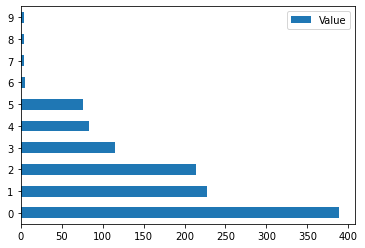

In [37]:
top_repeated.plot(kind="barh")

In [32]:
list(top_repeated.Product_Name)

['GIM MB8 ATX Case, Mid-Tower PC Gaming Chassis, Compact Computer Case with Tempered Glass Panel, 4 RGB Fans Pre-Installed, Water-Cooling Ready, Cable Management System - Black',
 'Noctua NF-P12 redux-1700 PWM, High Performance Cooling Fan, 4-Pin, 1700 RPM (120mm, Grey)',
 'Omnihil 8 Feet AC Power Cord Compatible with ASUS G11DF-DBR5-GTX1060 Desktop PC, AMD Ryzen 5 Processor, GTX 1060 - White',
 'Industrial Rugged Fanless Silent Mini PC Computer, Intel i5, Intel i7, Intel i9, Up to 8 Cores/16 Threads, Up to 1TB SSD, 32GB RAM, Wi-Fi, 4K, Windows 10 (Intel i5-8500T CPU + 240GB SSD + 8GB RAM)',
 'Cooler Master MasterLiquid ML120L RGB V2, Close-Loop AIO CPU Liquid Cooler, 120 Radiator, SickleFlow 120mm, RGB Lighting, 3rd Gen Dual Chamber Pump for AMD Ryzen/Intel LGA1200/1151',
 'Industrial Rugged Fanless Silent Mini PC Computer, Intel i5, Intel i7, Intel i9, Up to 8 Cores/16 Threads, Up to 1TB SSD, 32GB RAM, Wi-Fi, 4K, Windows 10 (Intel i7-8700T CPU + 500GB SSD + 16GB RAM)',
 'MSI GeForce 

<Figure size 720x14400 with 0 Axes>

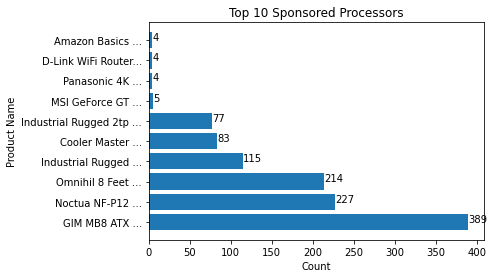

<Figure size 720x14400 with 0 Axes>

In [33]:
# Top 10 Sponsored Processors

x=['GIM MB8 ATX ...', 'Noctua NF-P12 ...', 'Omnihil 8 Feet ...',
 'Industrial Rugged ...',
 'Cooler Master ...',
 'Industrial Rugged 2tp ...',
 'MSI GeForce GT ...',
 'Panasonic 4K ...',
 'D-Link WiFi Router...',
 'Amazon Basics ...']
y=[389, 227, 214, 115, 83, 77, 5, 4, 4, 4]
fig = plt.barh(x, y)
for index, value in enumerate(y):
    plt.text(value, index, str(value))
plt.ylabel('Product Name')
plt.xlabel('Count')
plt.title('Top 10 Sponsored Processors')
plt.savefig("Top 10 Sponsored Processors.png", dpi=80)
plt.figure(figsize=(10,200))

In [34]:
processor.drop(columns=["freq_bought","freq_bought_link"],inplace=True)

In [38]:
# reset_index(drop=True) drops the current index of the DataFrame and replaces it with an index of increasing integers.

processor=processor.reset_index(drop=True)

In [39]:
# check ---------------------------------------------
# --------------------------

processor.product_tech_spec[0]

[{'info': 'Brand', 'value': 'AMD'},
 {'info': 'Series', 'value': 'Ryzen 5'},
 {'info': 'Item model number', 'value': 'Ryzen 5 3600'},
 {'info': 'Item Weight', 'value': '1.6 ounces'},
 {'info': 'Product Dimensions', 'value': '1.57 x 1.57 x 0.24 inches'},
 {'info': 'Item Dimensions  LxWxH', 'value': '1.57 x 1.57 x 0.24 inches'},
 {'info': 'Processor Brand', 'value': 'AMD'},
 {'info': 'Processor Count', 'value': '6'},
 {'info': 'Manufacturer', 'value': 'AMD'},
 {'info': 'ASIN', 'value': 'B07STGGQ18'},
 {'info': 'Is Discontinued By Manufacturer', 'value': 'No'},
 {'info': 'Date First Available', 'value': 'July 1, 2019'}]

In [11]:
processor.product_tech_spec[0][0]

{'info': 'Brand', 'value': 'AMD'}

In [12]:
processor.product_tech_spec[0][0]["info"]

'Brand'

In [13]:
# shows no results cause the value is Nan
processor.iloc[0]["other_tech_spec"]

In [14]:
processor.iloc[1]["other_tech_spec"]

[{'info': 'Brand', 'value': 'AMD'},
 {'info': 'Item model number', 'value': 'YD2600BBAFBOX'},
 {'info': 'Item Weight', 'value': '1 pounds'},
 {'info': 'Product Dimensions', 'value': '1.6 x 1.6 x 0.3 inches'},
 {'info': 'Item Dimensions  LxWxH', 'value': '1.6 x 1.6 x 0.3 inches'},
 {'info': 'Processor Brand', 'value': 'AMD'},
 {'info': 'Processor Count', 'value': '6'},
 {'info': 'Computer Memory Type', 'value': 'DDR4 SDRAM'},
 {'info': 'Manufacturer', 'value': 'AMD'},
 {'info': 'ASIN', 'value': 'B07B41WS48'},
 {'info': 'Is Discontinued By Manufacturer', 'value': 'No'},
 {'info': 'Date First Available', 'value': 'April 13, 2018'}]

In [15]:
processor.iloc[3]["product_addl_info"]

[{'info': 'Customer Reviews',
  'value': '/*\n* Fix for UDP-1061. Average customer reviews has a small extra line on hover\n* https://omni-grok.amazon.com/xref/src/appgroup/websiteTemplates/retail/SoftlinesDetailPageAssets/udp-intl-lock/src/legacy.css?indexName=WebsiteTemplates#40\n*/\n.noUnderline a:hover {\ntext-decoration: none;\n} 4.8 out of 5 stars 6,344 ratings P.when(\'A\', \'ready\').execute(function(A) {\nA.declarative(\'acrLink-click-metrics\', \'click\', { "allowLinkDefault" : true }, function(event){\nif(window.ue) {\nue.count("acrLinkClickCount", (ue.count("acrLinkClickCount") || 0) + 1);\n}\n});\n}); P.when(\'A\', \'cf\').execute(function(A) {\nA.declarative(\'acrStarsLink-click-metrics\', \'click\', { "allowLinkDefault" : true },  function(event){\nif(window.ue) {\nue.count("acrStarsLinkWithPopoverClickCount", (ue.count("acrStarsLinkWithPopoverClickCount") || 0) + 1);\n}\n});\n}); 4.8 out of 5 stars'},
 {'info': 'Best Sellers Rank', 'value': '#7 in Computer CPU Processor

In [16]:
#processor.drop(columns=["product_addl_info"],inplace=True)

In [17]:
processor.head()

,name,product_tech_spec,other_tech_spec,product_addl_info,seller,seller_link,link_to_all_reviews
0,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...","[{'info': 'Brand', 'value': 'AMD'}, {'info': '...",None,"[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,/AMD-Ryzen-3600-12-Thread-Processor/product-re...
1,AMD Ryzen 5 2600 Processor with Wraith Stealth...,"[{'info': 'Wireless Type', 'value': '802.11a'}]","[{'info': 'Brand', 'value': 'AMD'}, {'info': '...","[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,/AMD-Processor-Wraith-Stealth-Cooler/product-r...
2,Intel Core i9-9900K Desktop Processor 8 Cores ...,"[{'info': 'Brand', 'value': 'Intel'}, {'info':...",None,"[{'info': 'Customer Reviews', 'value': '/* * F...",DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...,/Intel-i9-9900K-Processor-Unlocked-BX806849900...
3,Intel Core i7-9700K Desktop Processor 8 Cores ...,"[{'info': 'Memory Speed', 'value': '3600 MHz'}...","[{'info': 'Brand', 'value': 'Intel'}, {'info':...","[{'info': 'Customer Reviews', 'value': '/* * F...",None,None,/Intel-i7-9700K-Desktop-Processor-Unlocked/pro...
4,Industrial Rugged Fanless Silent Mini PC Compu...,"[{'info': 'Max Screen Resolution', 'value': '3...","[{'info': 'Series', 'value': 'LITESHIELD 2.0'}...","[{'info': 'ASIN', 'value': 'B08BKRZB4Z'}, {'in...",Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...,/Industrial-Fanless-Computer-Threads-i5-8500T/...


In [18]:
# objective: creation of dataframe with all info found in processor.product_tech_spec[n]

# iteration through all rows
# iteration through all cells
# extract from all cells of all rows values corresponding to keyword "info" and append it in empty columns list
# keep just unique values
# print it

# code is NOT working because there are cells with Nan values
columns=[]
for i in range(len(processor)):
    for j in processor.product_tech_spec[i]:
        columns.append(j["info"])

columns=list(set(columns))

print(columns)

TypeError: 'NoneType' object is not iterable

In [19]:
# TECH SPECIFICATION
# 
# 
#  to optimize previous code I will have to add a try / except in the iteration that makes sure the code is still running whenever a Nan value is encountered
columns=[]
for i in range(len(processor)):
    try:
        for j in processor.product_tech_spec[i]:
            columns.append(j["info"])
    except:
        continue

columns=list(set(columns))
print(columns)


['Material Type', 'Output Wattage', 'Max Screen Resolution', 'Manufacturer Part Number', 'Is Discontinued By Manufacturer', 'Language:', 'Size', 'Folding', 'Graphics Card Ram Size', 'Voice command', 'Processor Count', 'Hard Drive Rotational Speed', 'Display Type', 'Standing screen display size', 'Model', 'Item Package Quantity', 'ASIN', 'Product Dimensions', 'Manufacturer', 'Depth (inches)', 'Style', 'Voltage', 'Preamp Outputs', 'Finish', 'Speaker Type', 'Assembled Width', 'Warranty', 'Included Components', 'Item model number', 'Flash Memory Size', 'Plug Profile', 'Package Dimensions', 'Special Features', 'Display Size', 'Memory Speed', 'Chipset Brand', 'Average Battery Life (in hours)', 'Warranty Description', 'Number Of Pieces', 'Assembled Height', 'Hardware Platform', 'Color Name', 'Department', 'National Stock Number', 'Batteries Required?', 'Number of Component Outputs', 'Power Source Type', 'Processor Brand', 'Item Weight', 'Part Number', 'Model number', 'Wireless Remote', 'Brand

In [20]:
product_tech_spec = pd.DataFrame(columns=columns)
product_tech_spec

,Material Type,Output Wattage,Max Screen Resolution,Manufacturer Part Number,Is Discontinued By Manufacturer,Language:,Size,Folding,Graphics Card Ram Size,Voice command,...,Operating System,Optical Drive Type,Graphics Coprocessor,Series,Batteries Included?,Batteries,Number of Items,Finish Types,Display resolution,Color


In [21]:
for i in range(len(processor)):
    try:
        for j in processor.product_tech_spec[i]:
            product_tech_spec.loc[i,j["info"]] = j["value"]
    except:
        product_tech_spec.loc[i,j["info"]] = ""
        continue

In [22]:
product_tech_spec

,Material Type,Output Wattage,Max Screen Resolution,Manufacturer Part Number,Is Discontinued By Manufacturer,Language:,Size,Folding,Graphics Card Ram Size,Voice command,...,Operating System,Optical Drive Type,Graphics Coprocessor,Series,Batteries Included?,Batteries,Number of Items,Finish Types,Display resolution,Color
0,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Ryzen 5,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3840 x 2160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Intel UHD Graphics 630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5886,NaN,NaN,1366*768 Pixels,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 GB,NaN,...,NaN,NaN,NVIDIA GeForce GTX 1650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
product_tech_spec.notnull().sum()

Material Type                         3
Output Wattage                        1
Max Screen Resolution              1622
Manufacturer Part Number             41
Is Discontinued By Manufacturer     558
                                   ... 
Batteries                            65
Number of Items                       7
Finish Types                          2
Display resolution                   20
Color                               385
Length: 81, dtype: int64

In [24]:
# in this code I use the shape columns[0] (shape is shown with [columns, rows] and I only need the columns) instead of the lenght of the df

columns=[]
for i in range(processor.shape[0]):
    try:
        for j in processor.other_tech_spec[i]:
            columns.append(j["info"])
    except:
        continue

columns= list(set(columns))
print(columns)

['National Stock Number', 'Product Dimensions', 'Hard Drive Interface', 'Battery Description', 'Processor Count', 'Is Discontinued By Manufacturer', 'Series', 'Computer Memory Type', 'Package Dimensions', 'Hard Drive Rotational Speed', 'Optical Drive Type', 'Language:', 'Batteries', 'Date First Available', 'Color', 'Rear Webcam Resolution', 'Item model number', 'Voltage', 'Manufacturer', 'Operating System', 'Audio-out Ports (#)', 'Flash Memory Size', 'Department', 'Item Dimensions  LxWxH', 'Item Weight', 'Power Source', 'ASIN', 'Hardware Platform', 'Brand', 'Processor Brand']


In [25]:
other_tech_spec = pd.DataFrame(columns=columns)
other_tech_spec

,National Stock Number,Product Dimensions,Hard Drive Interface,Battery Description,Processor Count,Is Discontinued By Manufacturer,Series,Computer Memory Type,Package Dimensions,Hard Drive Rotational Speed,...,Audio-out Ports (#),Flash Memory Size,Department,Item Dimensions LxWxH,Item Weight,Power Source,ASIN,Hardware Platform,Brand,Processor Brand


In [26]:
for i in range(processor.shape[0]):
    try:
        for j in processor.other_tech_spec[i]:
            other_tech_spec.loc[i,j["info"]] = j["value"]
    except:
        other_tech_spec.loc[i,j["info"]] = ""
        continue

In [27]:
other_tech_spec

,National Stock Number,Product Dimensions,Hard Drive Interface,Battery Description,Processor Count,Is Discontinued By Manufacturer,Series,Computer Memory Type,Package Dimensions,Hard Drive Rotational Speed,...,Audio-out Ports (#),Flash Memory Size,Department,Item Dimensions LxWxH,Item Weight,Power Source,ASIN,Hardware Platform,Brand,Processor Brand
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.6 x 1.6 x 0.3 inches,NaN,NaN,6,No,NaN,DDR4 SDRAM,NaN,NaN,...,NaN,NaN,NaN,1.6 x 1.6 x 0.3 inches,1 pounds,NaN,B07B41WS48,NaN,AMD,AMD
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.57 x 3.98 x 2.76 inches,NaN,NaN,8,No,NaN,DDR4 SDRAM,NaN,NaN,...,NaN,NaN,NaN,4.57 x 3.98 x 2.76 inches,1.59 ounces,NaN,B07HHN6KBZ,NaN,Intel,Intel
4,NaN,8 x 8 x 1.9 inches,Serial ATA-600,NaN,6,NaN,LITESHIELD 2.0,SODIMM,NaN,NaN,...,NaN,NaN,NaN,8 x 8 x 1.9 inches,5 pounds,DC,NaN,PC,NaN,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5885,NaN,12 x 13 x 3 inches,NaN,NaN,1,No,NaN,DDR4 SDRAM,NaN,NaN,...,NaN,NaN,NaN,12 x 13 x 3 inches,3.3 pounds,NaN,B07BMV9WJ4,NaN,ASRock,NaN
5886,NaN,NaN,ESATA,NaN,2,NaN,T460,DDR3L-1600 SDRAM,18 x 12 x 3 inches,NaN,...,NaN,NaN,NaN,NaN,5 pounds,NaN,NaN,PC,N&n,Intel
5887,NaN,8.86 x 4.69 x 1.57 inches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,8.86 x 4.69 x 1.57 inches,1.7 pounds,NaN,B081R359ZM,NaN,Gigabyte,NaN


In [28]:
columns=[]
for i in range(processor.shape[0]):
    try:
        for j in processor.product_addl_info[i]:
            columns.append(j["info"])
    except:
        continue

columns=list(set(columns))
columns

['National Stock Number',
 'Phone Talk Time',
 'Import Designation',
 'Supported Software',
 'Device interface - primary',
 'Back Material',
 'Body Material',
 'Language:',
 'Mixer Channel Quantity',
 'Manufacturer',
 'Color Screen',
 'Form Factor',
 'GPS',
 'Best Sellers Rank',
 'Power Source',
 'Hardware Platform',
 'Color Name',
 'Speaker Count',
 'Product Dimensions',
 'RAM',
 'Connector Type',
 'Scanner Resolution',
 'Mfg Recommended age',
 'Batteries',
 'Hardware Interface',
 'Item model number',
 'Binding',
 'OS',
 'Number of Strings',
 'International Shipping',
 'Battery type',
 'Material Type',
 'Included Components',
 'Other camera features',
 'Item Weight',
 'Processor Count',
 'Pricing',
 'Batteries Required',
 'Speaker Amplification Type',
 'Phone Standy Time (with data)',
 'Compatible Devices',
 'Rated',
 'Connectivity technologies',
 'Processor Speed',
 'Percussion Diameter',
 'Fretboard Material',
 'Wireless communication technologies',
 'Voltage',
 'Audio Jack',
 'Cust

In [29]:
product_addl_info = pd.DataFrame(columns=columns)
product_addl_info

,National Stock Number,Phone Talk Time,Import Designation,Supported Software,Device interface - primary,Back Material,Body Material,Language:,Mixer Channel Quantity,Manufacturer,...,Specific Uses For Product,Computer Platform,Other display features,Manufacturer recommended age,GPU,Top Material,Wattage,Colour,Release date,ASIN


In [30]:
for i in range(processor.shape[0]):
    try:
        for j in processor.product_addl_info[i]:
            product_addl_info.loc[i,j["info"]] = j["value"]
    except:
        product_addl_info.loc[i,j["info"]] = ""
        continue

In [31]:
product_addl_info

,National Stock Number,Phone Talk Time,Import Designation,Supported Software,Device interface - primary,Back Material,Body Material,Language:,Mixer Channel Quantity,Manufacturer,...,Specific Uses For Product,Computer Platform,Other display features,Manufacturer recommended age,GPU,Top Material,Wattage,Colour,Release date,ASIN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B08BKRZB4Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEELIYA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B08GC6VFF2
5885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B08L6HXX2R
5887,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
new_processor= pd.concat([pd.DataFrame(processor.name),product_tech_spec,other_tech_spec,product_addl_info,pd.DataFrame(processor.name),pd.DataFrame(processor.seller),pd.DataFrame(processor.seller_link)], axis=1)
new_processor

,name,National Stock Number,Chipset Brand,Hard Drive Interface,Number Of Pieces,Certification,Standing screen display size,Computer Memory Type,Hard Drive Rotational Speed,Folding,...,Manufacturer recommended age,GPU,Top Material,Wattage,Colour,Release date,ASIN,name,seller,seller_link
0,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",None,None
1,AMD Ryzen 5 2600 Processor with Wraith Stealth...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMD Ryzen 5 2600 Processor with Wraith Stealth...,None,None
2,Intel Core i9-9900K Desktop Processor 8 Cores ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i9-9900K Desktop Processor 8 Cores ...,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,Intel Core i7-9700K Desktop Processor 8 Cores ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i7-9700K Desktop Processor 8 Cores ...,None,None
4,Industrial Rugged Fanless Silent Mini PC Compu...,NaN,Intel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,B08BKRZB4Z,Industrial Rugged Fanless Silent Mini PC Compu...,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,YEELIYA PCIe USB 3.0 Card Type C USB Card Supe...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,B08GC6VFF2,YEELIYA PCIe USB 3.0 Card Type C USB Card Supe...,Yeeliya,https://www.amazon.com/gp/help/seller/at-a-gla...
5885,ASRock B360 Gaming K4 LGA1151/Intel B360/DDR4/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ASRock B360 Gaming K4 LGA1151/Intel B360/DDR4/...,None,None
5886,Used Like New Notebook Thinkpad T460 Ultrabook...,NaN,Intel,NaN,NaN,NaN,14.1 Inches,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,B08L6HXX2R,Used Like New Notebook Thinkpad T460 Ultrabook...,None,None
5887,Gigabyte Gv-N165SWF2OC-4GD GeForce GTX 1650 Su...,NaN,NVIDIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gigabyte Gv-N165SWF2OC-4GD GeForce GTX 1650 Su...,None,None


In [33]:
new_processor = new_processor.groupby(new_processor.columns,axis=1).first()
new_processor

,ASIN,Additional Features,Assembled Height,Assembled Length,Assembled Width,Audio Jack,Audio-out Ports (#),Average Battery Life (in hours),Back Material,Batteries,...,Warranty Description,Wattage,Weight,Wireless Microphone Frequency,Wireless Remote,Wireless Type,Wireless communication technologies,name,seller,seller_link
0,B07STGGQ18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",None,None
1,B07B41WS48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,802.11a,NaN,AMD Ryzen 5 2600 Processor with Wraith Stealth...,None,None
2,B089J731BX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i9-9900K Desktop Processor 8 Cores ...,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B07HHN6KBZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i7-9700K Desktop Processor 8 Cores ...,None,None
4,B08BKRZB4Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Rugged Fanless Silent Mini PC Compu...,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,B08GC6VFF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEELIYA PCIe USB 3.0 Card Type C USB Card Supe...,Yeeliya,https://www.amazon.com/gp/help/seller/at-a-gla...
5885,B07BMV9WJ4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bluetooth,NaN,ASRock B360 Gaming K4 LGA1151/Intel B360/DDR4/...,None,None
5886,B08L6HXX2R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 Lithium ion batteries required. (included),...,NaN,NaN,NaN,NaN,NaN,802.11ac,NaN,Used Like New Notebook Thinkpad T460 Ultrabook...,None,None
5887,B081R359ZM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gigabyte Gv-N165SWF2OC-4GD GeForce GTX 1650 Su...,None,None


In [34]:
new_processor= new_processor.rename(columns={"Processor Brand":"Brand", 'Brand Name':"Brand", 'Color Name':"Color","Colour":"Color"})

In [35]:
new_processor = new_processor.groupby(new_processor.columns,axis=1).first()
new_processor

,ASIN,Additional Features,Assembled Height,Assembled Length,Assembled Width,Audio Jack,Audio-out Ports (#),Average Battery Life (in hours),Back Material,Batteries,...,Warranty Description,Wattage,Weight,Wireless Microphone Frequency,Wireless Remote,Wireless Type,Wireless communication technologies,name,seller,seller_link
0,B07STGGQ18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",None,None
1,B07B41WS48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,802.11a,NaN,AMD Ryzen 5 2600 Processor with Wraith Stealth...,None,None
2,B089J731BX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i9-9900K Desktop Processor 8 Cores ...,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B07HHN6KBZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Intel Core i7-9700K Desktop Processor 8 Cores ...,None,None
4,B08BKRZB4Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Industrial Rugged Fanless Silent Mini PC Compu...,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,B08GC6VFF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YEELIYA PCIe USB 3.0 Card Type C USB Card Supe...,Yeeliya,https://www.amazon.com/gp/help/seller/at-a-gla...
5885,B07BMV9WJ4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Bluetooth,NaN,ASRock B360 Gaming K4 LGA1151/Intel B360/DDR4/...,None,None
5886,B08L6HXX2R,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1 Lithium ion batteries required. (included),...,NaN,NaN,NaN,NaN,NaN,802.11ac,NaN,Used Like New Notebook Thinkpad T460 Ultrabook...,None,None
5887,B081R359ZM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Gigabyte Gv-N165SWF2OC-4GD GeForce GTX 1650 Su...,None,None


In [246]:
new_processor.isnull().sum()

ASIN                                    112
Additional Features                    5797
Assembled Height                       5887
Assembled Length                       5887
Assembled Width                        5887
                                       ... 
Wireless Type                          3548
Wireless communication technologies    5618
name                                      0
seller                                 1640
seller_link                            1640
Length: 137, dtype: int64

In [247]:
new_processor.dropna(subset=["ASIN"],inplace=True)

In [248]:
new_pocessor=new_processor.reset_index(drop=True)

In [249]:
new_processor = new_processor.loc[:, list(new_processor.columns[list(new_processor.isnull().sum() < 4600)])]

In [250]:
new_processor.shape

(5777, 33)

In [251]:
new_processor.dtypes

ASIN                               object
Batteries                          object
Best Sellers Rank                  object
Brand                              object
Card Description                   object
Chipset Brand                      object
Color                              object
Computer Memory Type               object
Customer Reviews                   object
Date First Available               object
Flash Memory Size                  object
Graphics Coprocessor               object
Hard Drive Interface               object
Hardware Platform                  object
Is Discontinued By Manufacturer    object
Item Dimensions  LxWxH             object
Item Weight                        object
Item model number                  object
Manufacturer                       object
Max Screen Resolution              object
Memory Speed                       object
Number of USB 2.0 Ports            object
Operating System                   object
Package Dimensions                

In [253]:
type(new_processor["Processor Count"][0])

str

In [254]:
new_processor["Number of USB 2.0 Ports"] =  pd.to_numeric(new_processor["Number of USB 2.0 Ports"],errors='coerce').astype("Int64")
new_processor["Processor Count"] =  pd.to_numeric(new_processor["Processor Count"],errors='coerce').astype("Int64")

In [255]:
a = new_processor["Item Weight"].str.split(expand=True)
a.columns=["a","b"]
a.a = a['a'].astype(float)
a['a'] = np.where(a['b'] == 'ounces',a['a'] * 0.16 ,a['a'])
new_processor["Item Weight"] = a['a'].round(3)

In [256]:
new_processor["Product Dimensions"] = new_pocessor["Product Dimensions"].fillna(new_pocessor["Package Dimensions"])
new_processor.drop(columns="Package Dimensions", inplace=True)

In [257]:
new_processor=new_processor.rename(columns={"Product Dimensions":"Product_Dimensions_(inches)"})

In [258]:
new_processor["Product_Dimensions_(inches)"]=new_processor["Product_Dimensions_(inches)"].str.strip("inches")

In [259]:
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "365 days", "Average Battery Life (in hours)"] = 8760
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "", "Average Battery Life (in hours)"] = "nan"
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "8 \tyears", "Average Battery Life (in hours)"] = 70080
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "5 \tyears", "Average Battery Life (in hours)"] = 43800
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "6 \tyears", "Average Battery Life (in hours)"] = 52560
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "2 \tyears", "Average Battery Life (in hours)"] = 17520
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "1 \tyears", "Average Battery Life (in hours)"] = 8760
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "3 \tyears", "Average Battery Life (in hours)"] = 26280
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "10 \tyears", "Average Battery Life (in hours)"] = 87600
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "12 \tmonths", "Average Battery Life (in hours)"] = 8760
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "8 \tyears", "Average Battery Life (in hours)"] = 35040
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "7 days", "Average Battery Life (in hours)"] = 168
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "1 days", "Average Battery Life (in hours)"] = 24
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "2 days", "Average Battery Life (in hours)"] = 48
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "36 \tmonths", "Average Battery Life (in hours)"] = 26280
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "4 \tyears", "Average Battery Life (in hours)"] = 35040
# new_processor.loc[new_processor["Average Battery Life (in hours)"]== "6.00, 6.00, 6.00 Hours", "Average Battery Life (in hours)"] = 6
# new_processor["Average Battery Life (in hours)"].unique()

In [260]:
# new_processor["Average Battery Life (in hours)"] = new_processor["Average Battery Life (in hours)"].str.split(" ").str[0]
# new_processor["Average Battery Life (in hours)"] = new_processor["Average Battery Life (in hours)"].astype('float')

In [261]:
new_pocessor["Memory Speed"].unique()

array([nan, '3600 MHz', '2666 MHz', '3700 MHz', '2800 MHz', '2900 MHz',
       '3.4 GHz', '2.8 GHz', '1866 MHz', '2400 MHz', '2133 GHz',
       '3200 MHz', '1.8 GHz', '3.6 GHz', '2.6 GHz', '1 GHz', '4266 MHz',
       '1.6 GHz', '1600 MHz', '2133 MHz', '3300 MHz', '2.2 GHz',
       '1.5 GHz', '3100 MHz', '2933 MHz', '2.5 GHz', '3.1 GHz', '2.7 GHz',
       '', '2.3 GHz', '3.9 GHz', '1.3 GHz', '1.92 GHz', '2 GHz',
       '3.5 GHz', '1.1 GHz', '1200 MHz', '750 MHz', '3000 MHz',
       '3733 MHz', '4400 MHz', '4.1 GHz', '2.9 GHz', '4.5 GHz',
       '1333 MHz', '2.48 GHz', '2666 GHz', '2.4 GHz', '2300 MHz',
       '4.6 GHz', '4200 MHz', '2.16 GHz', '667 MHz', '1600 GHz',
       '3.2 GHz', '1.44 GHz', '1392 MHz', '4600 MHz', '4800 MHz',
       '14 GHz', '5000 MHz', '1866 GHz', '5200 MHz', '2035 MHz',
       '7008 MHz', '4700 MHz', '8 GHz', '1518 MHz', '700 MHz', '3.8 GHz',
       '4266.00', '128 MHz', '6008 MHz', '1.7 GHz', '7200 GHz', '2',
       '1530 MHz', '1.9 GHz', '4500 MHz', '1635 MHz'

In [262]:
a = new_processor["Memory Speed"].str.split(expand=True)
a.columns=["a","b"]
a.a = a['a'].astype(float)
a['a'] = np.where(a['b'] == 'MHz',a['a'] * 0.001 ,a['a'])
new_processor["Memory Speed"] = a['a'].round(2)
new_processor = new_processor.rename(columns={"Memory Speed":"Memory_Speed_(GHz)"}) 

In [263]:
new_processor.rename(columns={"Memory Speed":"Memory_Speed_(GHz)"}) 

,ASIN,Batteries,Best Sellers Rank,Brand,Card Description,Chipset Brand,Color,Computer Memory Type,Customer Reviews,Date First Available,...,Operating System,Power Source,Processor Count,Product_Dimensions_(inches),Series,Standing screen display size,Wireless Type,name,seller,seller_link
0,B07STGGQ18,NaN,#1 in Computer CPU Processors,AMD,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"July 1, 2019",...,NaN,NaN,6,1.57 x 1.57 x 0.24,Ryzen 5,NaN,NaN,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",None,None
1,B07B41WS48,NaN,#17 in Computer CPU Processors,AMD,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 13, 2018",...,NaN,NaN,6,1.6 x 1.6 x 0.3,NaN,NaN,802.11a,AMD Ryzen 5 2600 Processor with Wraith Stealth...,None,None
2,B089J731BX,NaN,#13 in Computer CPU Processors,Intel,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"June 1, 2020",...,NaN,NaN,1,6.3 x 10.24 x 3.15,NaN,NaN,NaN,Intel Core i9-9900K Desktop Processor 8 Cores ...,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B07HHN6KBZ,NaN,#7 in Computer CPU Processors,Intel,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"October 8, 2018",...,NaN,NaN,8,4.57 x 3.98 x 2.76,NaN,NaN,NaN,Intel Core i7-9700K Desktop Processor 8 Cores ...,None,None
4,B08BKRZB4Z,NaN,"#290,502 in Computers & Accessories ( See Top ...",Intel,NaN,Intel,NaN,SODIMM,/*\n* Fix for UDP-1061. Average customer revie...,"June 26, 2020",...,Windows 10,DC,6,8 x 8 x 1.9,LITESHIELD 2.0,NaN,NaN,Industrial Rugged Fanless Silent Mini PC Compu...,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,B08GC6VFF2,,#62 in Internal USB Port Cards,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"August 20, 2020",...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,YEELIYA PCIe USB 3.0 Card Type C USB Card Supe...,Yeeliya,https://www.amazon.com/gp/help/seller/at-a-gla...
5885,B07BMV9WJ4,NaN,"#2,254 in Computer Motherboards",ASRock,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 10, 2018",...,NaN,NaN,1,NaN,NaN,NaN,Bluetooth,ASRock B360 Gaming K4 LGA1151/Intel B360/DDR4/...,None,None
5886,B08L6HXX2R,1 Lithium ion batteries required. (included),"#67,794 in Computers & Accessories ( See Top 1...",N&n,Integrated,Intel,NaN,DDR3L-1600 SDRAM,NaN,"September 16, 2020",...,Windows,NaN,2,NaN,T460,14.1 Inches,802.11ac,Used Like New Notebook Thinkpad T460 Ultrabook...,None,None
5887,B081R359ZM,NaN,#687 in Computer Graphics Cards,Gigabyte,Integrated,NVIDIA,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"November 22, 2019",...,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,Gigabyte Gv-N165SWF2OC-4GD GeForce GTX 1650 Su...,None,None


In [264]:
new_processor=new_processor[['ASIN',
'name',
 'Batteries',
 'Best Sellers Rank',
 'Brand',
 'Card Description',
 'Chipset Brand',
 'Color',
 'Computer Memory Type',
 'Customer Reviews',
 'Date First Available',
 'Flash Memory Size',
 'Graphics Coprocessor',
 'Hard Drive Interface',
 'Hardware Platform',
 'Is Discontinued By Manufacturer',
 'Item Dimensions  LxWxH',
 'Item Weight',
 'Item model number',
 'Manufacturer',
 'Max Screen Resolution',
 'Memory_Speed_(GHz)',
 'Number of USB 2.0 Ports',
 'Operating System',
 'Power Source',
 'Processor Count',
 'Product_Dimensions_(inches)',
 'Series',
 'Standing screen display size',
 'Wireless Type',
 'seller',
 'seller_link']]

In [276]:
new_processor.columns=['ASIN',
'title',
 'Batteries',
 'Best_Sellers_Rank',
 'Brand',
 'Card_Description',
 'Chipset_Brand',
 'Color',
 'Computer_Memory_Type',
 'Customer_Reviews',
 'Date_First_Available',
 'Flash_Memory_Size',
 'Graphics_Coprocessor',
 'Hard_Drive_Interface',
 'Hardware_Platform',
 'Is_Discontinued_By_Manufacturer',
 'Item_Dimensions_LxWxH',
 'Item_Weight',
 'Item_model_number',
 'Manufacturer',
 'Max_Screen_Resolution',
 'Memory_Speed_(GHz)',
 'Number_of_USB_2.0_Ports',
 'Operating_System',
 'Power_Source',
 'Processor_Count',
 'Product_Dimensions_(inches)',
 'Series',
 'Standing_screen_display_size',
 'Wireless_Type',
 'seller',
 'seller_link']

In [277]:
new_processor

,ASIN,title,Batteries,Best_Sellers_Rank,Brand,Card_Description,Chipset_Brand,Color,Computer_Memory_Type,Customer_Reviews,...,Number_of_USB_2.0_Ports,Operating_System,Power_Source,Processor_Count,Product_Dimensions_(inches),Series,Standing_screen_display_size,Wireless_Type,seller,seller_link
0,B07STGGQ18,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",NaN,#1 in Computer CPU Processors,AMD,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,...,<NA>,NaN,NaN,6,1.57 x 1.57 x 0.24,Ryzen 5,NaN,NaN,None,None
1,B07B41WS48,AMD Ryzen 5 2600 Processor with Wraith Stealth...,NaN,#17 in Computer CPU Processors,AMD,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,...,<NA>,NaN,NaN,6,1.6 x 1.6 x 0.3,NaN,NaN,802.11a,None,None
2,B089J731BX,Intel Core i9-9900K Desktop Processor 8 Cores ...,NaN,#13 in Computer CPU Processors,Intel,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,...,<NA>,NaN,NaN,1,6.3 x 10.24 x 3.15,NaN,NaN,NaN,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...
3,B07HHN6KBZ,Intel Core i7-9700K Desktop Processor 8 Cores ...,NaN,#7 in Computer CPU Processors,Intel,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,...,1,NaN,NaN,8,4.57 x 3.98 x 2.76,NaN,NaN,NaN,None,None
4,B08BKRZB4Z,Industrial Rugged Fanless Silent Mini PC Compu...,NaN,"#290,502 in Computers & Accessories ( See Top ...",Intel,NaN,Intel,NaN,SODIMM,/*\n* Fix for UDP-1061. Average customer revie...,...,6,Windows 10,DC,6,8 x 8 x 1.9,LITESHIELD 2.0,NaN,NaN,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,B08GC6VFF2,YEELIYA PCIe USB 3.0 Card Type C USB Card Supe...,,#62 in Internal USB Port Cards,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,...,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,Yeeliya,https://www.amazon.com/gp/help/seller/at-a-gla...
5885,B07BMV9WJ4,ASRock B360 Gaming K4 LGA1151/Intel B360/DDR4/...,NaN,"#2,254 in Computer Motherboards",ASRock,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,...,2,NaN,NaN,1,NaN,NaN,NaN,Bluetooth,None,None
5886,B08L6HXX2R,Used Like New Notebook Thinkpad T460 Ultrabook...,1 Lithium ion batteries required. (included),"#67,794 in Computers & Accessories ( See Top 1...",N&n,Integrated,Intel,NaN,DDR3L-1600 SDRAM,NaN,...,<NA>,Windows,NaN,2,NaN,T460,14.1 Inches,802.11ac,None,None
5887,B081R359ZM,Gigabyte Gv-N165SWF2OC-4GD GeForce GTX 1650 Su...,NaN,#687 in Computer Graphics Cards,Gigabyte,Integrated,NVIDIA,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,...,<NA>,NaN,NaN,<NA>,NaN,NaN,NaN,NaN,None,None


In [267]:
a = new_processor['Best_Sellers_Rank'].str.split(expand=True)
a.columns=['c1', 'c2', 'c3', 'c4','c5','c6','c7', 'c8', 'c9', 'c41','c51','c61','c12', 'c22', 'c32', 'c42','c52','c62','c13', 'c23', 'c33', 'c43','c53','c63','c14', 'c24', 'c34', 'c44','c54']
a["c1"]  = a["c1"] .str.replace('#', '').str.replace(',', '')

In [268]:
a=a.rename(columns={"c1":"Seller_rank"})
x= pd.DataFrame(a.Seller_rank)
x

,Seller_rank
0,1
1,17
2,13
3,7
4,290502
...,...
5884,62
5885,2254
5886,67794
5887,687


In [269]:
Seller_category = a.c3 + a.c4
y = pd.DataFrame(Seller_category)
y.columns = ["Seller_category"]
y

,Seller_category
0,ComputerCPU
1,ComputerCPU
2,ComputerCPU
3,ComputerCPU
4,Computers&
...,...
5884,InternalUSB
5885,ComputerMotherboards
5886,Computers&
5887,ComputerGraphics


In [270]:
processor = pd.concat([new_processor, x, y],axis=1)
processor.drop(columns="Best_Sellers_Rank",inplace=True)

In [271]:
processor.Seller_category = processor.Seller_category.str.replace("&","")
processor

,ASIN,title,Batteries,Brand,Card_Description,Chipset_Brand,Color,Computer_Memory_Type,Customer_Reviews,Date_First_Available,...,Power_Source,Processor_Count,Product_Dimensions_(inches),Series,Standing_screen_display_size,Wireless_Type,seller,seller_link,Seller_rank,Seller_category
0,B07STGGQ18,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",NaN,AMD,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"July 1, 2019",...,NaN,6,1.57 x 1.57 x 0.24,Ryzen 5,NaN,NaN,None,None,1,ComputerCPU
1,B07B41WS48,AMD Ryzen 5 2600 Processor with Wraith Stealth...,NaN,AMD,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 13, 2018",...,NaN,6,1.6 x 1.6 x 0.3,NaN,NaN,802.11a,None,None,17,ComputerCPU
2,B089J731BX,Intel Core i9-9900K Desktop Processor 8 Cores ...,NaN,Intel,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"June 1, 2020",...,NaN,1,6.3 x 10.24 x 3.15,NaN,NaN,NaN,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...,13,ComputerCPU
3,B07HHN6KBZ,Intel Core i7-9700K Desktop Processor 8 Cores ...,NaN,Intel,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"October 8, 2018",...,NaN,8,4.57 x 3.98 x 2.76,NaN,NaN,NaN,None,None,7,ComputerCPU
4,B08BKRZB4Z,Industrial Rugged Fanless Silent Mini PC Compu...,NaN,Intel,NaN,Intel,NaN,SODIMM,/*\n* Fix for UDP-1061. Average customer revie...,"June 26, 2020",...,DC,6,8 x 8 x 1.9,LITESHIELD 2.0,NaN,NaN,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...,290502,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,B08GC6VFF2,YEELIYA PCIe USB 3.0 Card Type C USB Card Supe...,,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"August 20, 2020",...,NaN,<NA>,NaN,NaN,NaN,NaN,Yeeliya,https://www.amazon.com/gp/help/seller/at-a-gla...,62,InternalUSB
5885,B07BMV9WJ4,ASRock B360 Gaming K4 LGA1151/Intel B360/DDR4/...,NaN,ASRock,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 10, 2018",...,NaN,1,NaN,NaN,NaN,Bluetooth,None,None,2254,ComputerMotherboards
5886,B08L6HXX2R,Used Like New Notebook Thinkpad T460 Ultrabook...,1 Lithium ion batteries required. (included),N&n,Integrated,Intel,NaN,DDR3L-1600 SDRAM,NaN,"September 16, 2020",...,NaN,2,NaN,T460,14.1 Inches,802.11ac,None,None,67794,Computers
5887,B081R359ZM,Gigabyte Gv-N165SWF2OC-4GD GeForce GTX 1650 Su...,NaN,Gigabyte,Integrated,NVIDIA,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"November 22, 2019",...,NaN,<NA>,NaN,NaN,NaN,NaN,None,None,687,ComputerGraphics


In [272]:
a = processor["Flash_Memory_Size"].str.split(expand=True)
a.columns=["a","b"]
a.a = a['a'].astype(float)
a['a'] = np.where(a['b'] == 'TB',a['a'] * 1000 ,a['a'])
a['a'] = np.where(a['b'] == 'MB',a['a'] / 1000 ,a['a'])
processor["Flash_Memory_Size"] = a['a'].round(2)
processor = processor.rename(columns={"Flash_Memory_Size":"Memory_Speed_(GB)"}) 

In [274]:
processor.drop(columns=["Standing_screen_display_size"], inplace=True)

In [278]:
processor = processor.rename(columns={"Item_Weight":"Item_Weight_(pounds)"}) 

In [286]:
processor["Product_Dimensions_(inches)"] = processor["Product_Dimensions_(inches)"].fillna(processor["Item_Dimensions_LxWxH"])
processor.drop(columns="Item_Dimensions_LxWxH", inplace=True)

In [289]:
processor

,ASIN,title,Batteries,Brand,Card_Description,Chipset_Brand,Color,Computer_Memory_Type,Customer_Reviews,Date_First_Available,...,Operating_System,Power_Source,Processor_Count,Product_Dimensions_(inches),Series,Wireless_Type,seller,seller_link,Seller_rank,Seller_category
0,B07STGGQ18,"AMD Ryzen 5 3600 6-Core, 12-Thread Unlocked De...",NaN,AMD,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"July 1, 2019",...,NaN,NaN,6,1.57 x 1.57 x 0.24,Ryzen 5,NaN,None,None,1,ComputerCPU
1,B07B41WS48,AMD Ryzen 5 2600 Processor with Wraith Stealth...,NaN,AMD,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 13, 2018",...,NaN,NaN,6,1.6 x 1.6 x 0.3,NaN,802.11a,None,None,17,ComputerCPU
2,B089J731BX,Intel Core i9-9900K Desktop Processor 8 Cores ...,NaN,Intel,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"June 1, 2020",...,NaN,NaN,1,6.3 x 10.24 x 3.15,NaN,NaN,DealsPro1,https://www.amazon.com/gp/help/seller/at-a-gla...,13,ComputerCPU
3,B07HHN6KBZ,Intel Core i7-9700K Desktop Processor 8 Cores ...,NaN,Intel,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"October 8, 2018",...,NaN,NaN,8,4.57 x 3.98 x 2.76,NaN,NaN,None,None,7,ComputerCPU
4,B08BKRZB4Z,Industrial Rugged Fanless Silent Mini PC Compu...,NaN,Intel,NaN,Intel,NaN,SODIMM,/*\n* Fix for UDP-1061. Average customer revie...,"June 26, 2020",...,Windows 10,DC,6,8 x 8 x 1.9,LITESHIELD 2.0,NaN,Critical Products LLC,https://www.amazon.com/gp/help/seller/at-a-gla...,290502,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5884,B08GC6VFF2,YEELIYA PCIe USB 3.0 Card Type C USB Card Supe...,,NaN,NaN,NaN,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"August 20, 2020",...,NaN,NaN,<NA>,NaN,NaN,NaN,Yeeliya,https://www.amazon.com/gp/help/seller/at-a-gla...,62,InternalUSB
5885,B07BMV9WJ4,ASRock B360 Gaming K4 LGA1151/Intel B360/DDR4/...,NaN,ASRock,NaN,NaN,NaN,DDR4 SDRAM,/*\n* Fix for UDP-1061. Average customer revie...,"April 10, 2018",...,NaN,NaN,1,12 x 13 x 3 inches,NaN,Bluetooth,None,None,2254,ComputerMotherboards
5886,B08L6HXX2R,Used Like New Notebook Thinkpad T460 Ultrabook...,1 Lithium ion batteries required. (included),N&n,Integrated,Intel,NaN,DDR3L-1600 SDRAM,NaN,"September 16, 2020",...,Windows,NaN,2,NaN,T460,802.11ac,None,None,67794,Computers
5887,B081R359ZM,Gigabyte Gv-N165SWF2OC-4GD GeForce GTX 1650 Su...,NaN,Gigabyte,Integrated,NVIDIA,NaN,NaN,/*\n* Fix for UDP-1061. Average customer revie...,"November 22, 2019",...,NaN,NaN,<NA>,8.86 x 4.69 x 1.57 inches,NaN,NaN,None,None,687,ComputerGraphics


In [294]:
processor.drop_duplicates(subset="ASIN", inplace=True)
processor = processor.reset_index(drop=True)
processor.shape

(3501, 31)

In [296]:
processor.to_csv(r"C:\Users\Davide Della Valle\Desktop\CAB\Project 3\CAB-Processors\product_processor.csv", index=False)